In [1]:
import sys
from io import StringIO
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
def get_data():
    train_data_path ='train.csv'
    train = pd.read_csv(train_data_path)
    seed = 7
    np.random.seed(seed)
    train_target = train.Servidas
    train.drop(['Servidas'],axis = 1 , inplace = True)
    return train,train_target

In [3]:
train,train_target = get_data()
k_flods=10

In [4]:
# Create linear regression object
metrics=np.zeros((2,k_flods))
regr = linear_model.LinearRegression(n_jobs=4)
kf = KFold(n_splits=k_flods)
kf.get_n_splits(train)
i=0
for train_index, test_index in kf.split(train):        
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = train_target.values[train_index], train_target.values[test_index]    
    regr.fit(X_train, y_train)   
    validation_prediction = regr.predict(X_test)
    validation_prediction=validation_prediction.astype(int)
    metrics[0][i]=sqrt(mean_squared_error(y_test, validation_prediction))
    metrics[1][i]=r2_score(y_test, validation_prediction)
    i=i+1
    
metrics=np.sum(metrics, axis=1)/k_flods
# LINEAR REGRESSION
print("Mean squared error:%.2f"%metrics[0])
print("r2 score:%.2f"%metrics[1])

Mean squared error:1392.92
r2 score:0.76


In [5]:
# Print a small groups
X_test=X_test[0:20,:]
y_test=y_test.reshape((y_test.shape[0],1))[0:20,:]
Data = PCA(n_components=1).fit_transform(X_test)
validation_prediction=validation_prediction.reshape((validation_prediction.shape[0],1))[0:20]

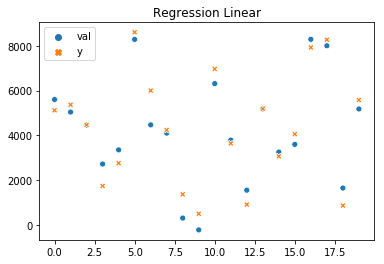

In [6]:
y=pd.DataFrame(y_test, columns=['y'])
x=pd.DataFrame(Data, columns=['x'])
validation=pd.DataFrame(validation_prediction,columns=['val'])
data_= pd.concat([x, validation,y], axis=1)
data_
#sns.pairplot(data_, palette="husl",x_vars=["x"],y_vars=["y" , "val"], kind="reg")
sns.scatterplot(data=data_).set_title("Regression Linear")
plt.show()

In [7]:
# Create linear regression object
train,train_target=get_data()
metrics=np.zeros((2,k_flods))
clf = linear_model.Lasso(alpha=1,max_iter=100000)
kf = KFold(n_splits=k_flods)
kf.get_n_splits(train)
i=0
for train_index, test_index in kf.split(train):        
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = train_target.values[train_index], train_target.values[test_index]
    clf.fit(X_train, y_train)
    validation_prediction = clf.predict(X_test)
    metrics[0][i]=sqrt(mean_squared_error(y_test, validation_prediction))
    metrics[1][i]=r2_score(y_test, validation_prediction)
    i=i+1
    
metrics=np.sum(metrics, axis=1)/k_flods
# LINEAR REGRESSION LASSO
print("Mean squared error:%.2f"%metrics[0])
print("r2 score:%.2f"%metrics[1])

Mean squared error:1093.89
r2 score:0.86


In [8]:
# Print a small groups
X_test=X_test[0:20,:]
y_test=y_test.reshape((y_test.shape[0],1))[0:20,:]
Data = PCA(n_components=1).fit_transform(X_test)
validation_prediction=validation_prediction.reshape((validation_prediction.shape[0],1))[0:20]

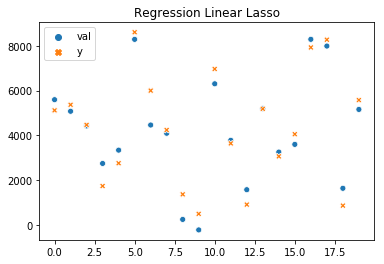

In [14]:
y=pd.DataFrame(y_test, columns=['y'])
x=pd.DataFrame(Data, columns=['x'])
validation=pd.DataFrame(validation_prediction,columns=['val'])
data_= pd.concat([x, validation,y], axis=1)
sns.scatterplot(data=data_).set_title("Regression Linear Lasso")
plt.show()

In [10]:
# Create linear regression object
train,train_target=get_data()
metrics=np.zeros((2,k_flods))
ard = linear_model.Ridge(max_iter=1000000,alpha=0.01)
kf = KFold(n_splits=k_flods)
kf.get_n_splits(train)
i=0
for train_index, test_index in kf.split(train):        
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = train_target.values[train_index], train_target.values[test_index]
    ard.fit(X_train, y_train)
    validation_prediction = ard.predict(X_test)
    metrics[0][i]=sqrt(mean_squared_error(y_test, validation_prediction))
    metrics[1][i]=r2_score(y_test, validation_prediction)
    i=i+1
    
metrics=np.sum(metrics, axis=1)/k_flods
# LINEAR REGRESSION Ridge
print("Mean squared error:%.2f"%metrics[0])
print("r2 score:%.2f"%metrics[1])

Mean squared error:1248.85
r2 score:0.81


In [11]:
# Print a small groups
X_test=X_test[0:20,:]
y_test=y_test.reshape((y_test.shape[0],1))[0:20,:]
Data = PCA(n_components=1).fit_transform(X_test)
validation_prediction=validation_prediction.reshape((validation_prediction.shape[0],1))[0:20]

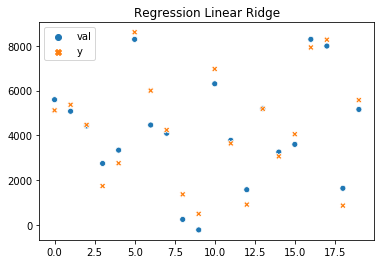

In [12]:
y=pd.DataFrame(y_test, columns=['y'])
x=pd.DataFrame(Data, columns=['x'])
validation=pd.DataFrame(validation_prediction,columns=['val'])
data_= pd.concat([x, validation,y], axis=1)
sns.scatterplot(data=data_).set_title("Regression Linear Ridge")
plt.show()